### This Jupyter notebook is an example of the <a href='https://github.com/sassoftware/saspy'>saspy</a> package for python 3.x.  Saspy allows users to connect to SAS from python and submit SAS code in a more 'pythonic' way.  This Jupyter notebook provides an example of doing data analysis in pandas, passing the results to SAS, and pulling the SAS results back to python. 

## Import necessary python packages

In [1]:
import saspy
import pandas as pd
from IPython.display import HTML

import seaborn as sns
import numpy as np

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 14 

## Read in CSV file into a pandas dataframe

In [2]:
saspy_df = pd.read_csv('C:\\sasdata\\saspy_csv.csv')

## List the variables in the data file

In [3]:
saspy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 38 columns):
xIn1       float64
xIn2       float64
xIn3       float64
xIn4       float64
xIn5       float64
xIn6       float64
xIn7       float64
xIn8       float64
xIn9       float64
xIn10      float64
xOut1      float64
xOut2      float64
xOut3      float64
xOut4      float64
xOut5      float64
xOut6      float64
xOut7      float64
xOut8      float64
xOut9      float64
xOut10     float64
xOut11     float64
xOut12     float64
xOut13     float64
xOut14     float64
xOut15     float64
cIn1       int64
cIn2       int64
cIn3       int64
cIn4       int64
cIn5       int64
cOut1      int64
cOut2      int64
cOut3      int64
cOut4      int64
cOut5      int64
xSubtle    float64
xTiny      float64
yBinary    int64
dtypes: float64(27), int64(11)
memory usage: 1.4 GB


## List the first 5 rows of the pandas dataframe

In [4]:
pd.options.display.max_columns = 120
saspy_df.head()

,xIn1,xIn2,xIn3,xIn4,xIn5,xIn6,xIn7,xIn8,xIn9,xIn10,xOut1,xOut2,xOut3,xOut4,xOut5,xOut6,xOut7,xOut8,xOut9,xOut10,xOut11,xOut12,xOut13,xOut14,xOut15,cIn1,cIn2,cIn3,cIn4,cIn5,cOut1,cOut2,cOut3,cOut4,cOut5,xSubtle,xTiny,yBinary
0,0.184963,0.970089,0.399824,0.259399,0.921603,0.969277,0.542979,0.531692,0.049794,0.066567,0.819319,0.523871,0.853394,0.067185,0.957024,0.297194,0.272612,0.689930,0.976765,0.226508,0.688237,0.412764,0.558554,0.287226,0.475789,2,2,2,4,3,2,3,3,2,2,0.844987,0.634524,0
1,0.679526,0.168088,0.166526,0.871105,0.298790,0.934642,0.900471,0.568783,0.049546,0.135588,0.511318,0.433205,0.176106,0.665036,0.404819,0.124549,0.453487,0.199553,0.574837,0.738474,0.439812,0.049367,0.522382,0.343365,0.022712,1,3,3,1,1,1,2,2,1,2,0.712888,0.937065,1
2,0.189850,0.147966,0.561836,0.270109,0.325199,0.569178,0.042594,0.439211,0.917435,0.525842,0.731816,0.905224,0.576004,0.187943,0.331326,0.698874,0.121563,0.180666,0.270639,0.653212,0.421373,0.037978,0.270806,0.427734,0.820103,1,1,2,2,4,2,2,3,4,2,0.843453,0.876910,1
3,0.557177,0.875043,0.571239,0.756771,0.148429,0.025437,0.817217,0.658219,0.029473,0.853393,0.362853,0.377318,0.510541,0.711941,0.375330,0.229537,0.686214,0.552432,0.581818,0.174722,0.046096,0.643799,0.645448,0.093167,0.620078,1,2,1,2,4,1,3,2,5,1,0.078453,0.689258,0
4,0.078996,0.145118,0.224436,0.347550,0.702127,0.491452,0.631349,0.906361,0.304070,0.925854,0.440649,0.608385,0.781923,0.426327,0.125292,0.740441,0.194803,0.816726,0.085476,0.183762,0.332636,0.705581,0.927611,0.296419,0.224042,1,2,2,2,1,1,3,2,3,5,0.147189,0.590641,0


## Create list of true numeric variables in pandas dataframe 

In [5]:
NumVar=[]

#xIn Variables
for i in range(1,11):
    NumVar.append('xIn'+str(i))

#xOut Variables
for i in range(1,16):
    NumVar.append('xOut'+str(i))

#Additional variables xSubtle xTiny
NumVar.append('xSubtle')
NumVar.append('xTiny')

## Calculate basic statistics on the numerical variables

In [6]:
saspy_df[NumVar].describe()


,xIn1,xIn2,xIn3,xIn4,xIn5,xIn6,xIn7,xIn8,xIn9,xIn10,xOut1,xOut2,xOut3,xOut4,xOut5,xOut6,xOut7,xOut8,xOut9,xOut10,xOut11,xOut12,xOut13,xOut14,xOut15,xSubtle,xTiny
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,4.998165e-01,4.998780e-01,5.000676e-01,4.999919e-01,4.997963e-01,4.998746e-01,5.000454e-01,5.001192e-01,5.000904e-01,5.001179e-01,5.001011e-01,5.000822e-01,5.001255e-01,5.000618e-01,4.999266e-01,5.000225e-01,4.998456e-01,4.999599e-01,5.002351e-01,4.998932e-01,5.000685e-01,5.000123e-01,4.997809e-01,5.001700e-01,5.001164e-01,4.998640e-01,5.001353e-01
std,2.887632e-01,2.887023e-01,2.886115e-01,2.886381e-01,2.886273e-01,2.886578e-01,2.887934e-01,2.886700e-01,2.886175e-01,2.886425e-01,2.887140e-01,2.886111e-01,2.886322e-01,2.886152e-01,2.886110e-01,2.885822e-01,2.886715e-01,2.886963e-01,2.885385e-01,2.885821e-01,2.887517e-01,2.887070e-01,2.887654e-01,2.886934e-01,2.886341e-01,2.886261e-01,2.886691e-01
min,6.239861e-08,1.266599e-07,3.259629e-07,9.033829e-08,6.193295e-08,4.130416e-07,1.117587e-08,7.450581e-09,2.221204e-07,6.146729e-08,4.097819e-08,5.522743e-07,3.380701e-07,1.708977e-07,3.632158e-08,2.421439e-08,6.519258e-09,1.997687e-07,1.331791e-07,3.585592e-08,8.484349e-07,4.461035e-07,3.492460e-08,7.869676e-08,2.342276e-07,1.345761e-07,1.066364e-07
25%,2.496096e-01,2.498617e-01,2.501626e-01,2.500678e-01,2.497836e-01,2.500051e-01,2.498010e-01,2.502558e-01,2.503087e-01,2.501168e-01,2.501512e-01,2.504131e-01,2.500928e-01,2.502193e-01,2.500072e-01,2.501881e-01,2.497294e-01,2.499404e-01,2.505383e-01,2.498961e-01,2.500005e-01,2.501210e-01,2.498164e-01,2.501658e-01,2.503171e-01,2.500622e-01,2.502547e-01
50%,4.997560e-01,4.998225e-01,4.999209e-01,5.001456e-01,4.998216e-01,4.998608e-01,4.999328e-01,5.001864e-01,5.001125e-01,5.001682e-01,4.999643e-01,4.999730e-01,5.002354e-01,5.000845e-01,4.995691e-01,5.000517e-01,4.996608e-01,4.999468e-01,5.002918e-01,4.999206e-01,5.000409e-01,5.000372e-01,4.996408e-01,5.003559e-01,5.000698e-01,4.997384e-01,5.002104e-01
75%,7.500128e-01,7.499046e-01,7.501089e-01,7.498882e-01,7.495521e-01,7.498130e-01,7.502449e-01,7.499870e-01,7.499786e-01,7.500637e-01,7.500022e-01,7.500344e-01,7.501136e-01,7.498141e-01,7.499272e-01,7.497625e-01,7.498188e-01,7.499387e-01,7.501088e-01,7.497098e-01,7.501606e-01,7.500008e-01,7.497724e-01,7.502469e-01,7.501487e-01,7.498195e-01,7.502317e-01
max,9.999999e-01,9.999999e-01,9.999998e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999998e-01,9.999999e-01,9.999997e-01,1.000000e+00,9.999993e-01,9.999996e-01,9.999995e-01,9.999998e-01,9.999989e-01,9.999999e-01,1.000000e+00,9.999999e-01,9.999999e-01,9.999999e-01,9.999998e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00


## Calculate the Correlations of continuous variables

In [7]:
saspy_corr_df=saspy_df[NumVar].corr()

## Plot the correlations using a heatmap

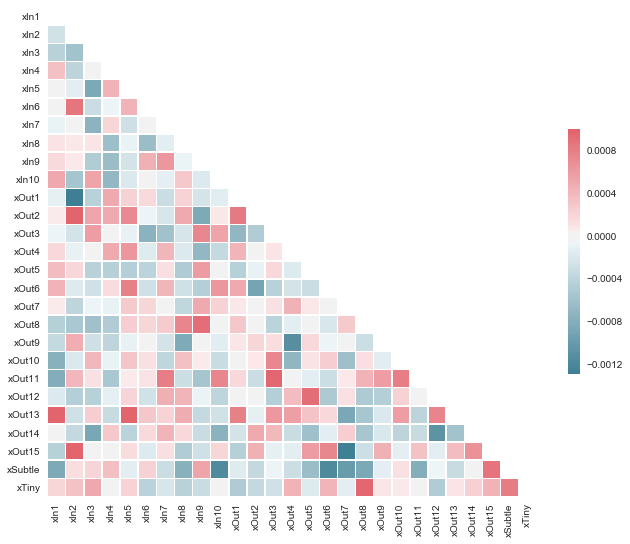

In [8]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(saspy_corr_df, dtype=np.bool)
t=mask
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(saspy_corr_df, mask=mask, cmap=cmap, vmax=.001, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Create a connection to the SAS Server

In [9]:
sas=saspy.SASsession(results='Pandas')

Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 24180



## Convert the pandas dataframe to a sas7bdat to leverage SAS functionality 

In [10]:
saspy_ds_handle=sas.df2sd(saspy_df,'saspy_ds')

## Load SAS/STAT package.  Other packages include  ETS, QC, and Machine Learning

### Check out https://sassoftware.github.io/saspy/adding-procedures.html for information on how to add procedures

In [11]:
stat=sas.sasstat()

## Use the 'dot tab' to see the available methods in SAS/STAT.  

In [12]:
#stat.

## Define a SAS library as one to permantly save SAS output

In [13]:
sas.saslib(libref='sasdata', path='c:\\sasdata')

10                                                         The SAS System                             10:15 Wednesday, June 27, 2018

5909154    options nosource;
5909294    
11                                                         The SAS System                             10:15 Wednesday, June 27, 2018

5909295    
5909296    libname sasdata    'c:\sasdata'  ;
NOTE: Libref SASDATA was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: c:\sasdata
5909297    
5909298    


## Build a logistic model in SAS using 'SMP' mode.  For more information, see the <a href='https://support.sas.com/documentation/onlinedoc/stat/143/hplogistic.pdf'> HPLOGISTIC document</a>. 

## <a href='http://support.sas.com/resources/papers/proceedings13/401-2013.pdf'>Read more about the benefits of HP procdures</a>. 

In [14]:
logistic_model=stat.hplogistic(model='yBinary(desc)=xIn1-xIn10 xOut1-xOut15 cIn1-cIn5 cOut1-cOut5'
                               ,data=saspy_ds_handle
                               ,cls='cIn1-cIn5 cOut1-cOut5'
                               ,partition='fraction(validate=0.25)'
                               ,selection='stepwise'
                               ,id='_ALL_'
                               ,stmtpassthrough="output out=sasdata.logisticmodel predicted=predicted / allstats" 
                              )


## List all the requested output from the logistic model

In [15]:
dir(logistic_model)

['CLASSLEVELS',
 'CONVERGENCESTATUS',
 'DATAACCESSINFO',
 'DIMENSIONS',
 'FITSTATISTICS',
 'GLOBALTESTS',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PARAMETERESTIMATES',
 'PARTFITSTATS',
 'PERFORMANCEINFO',
 'RESPONSEPROFILE',
 'SELECTEDEFFECTS',
 'SELECTIONINFO',
 'SELECTIONREASON',
 'SELECTIONSUMMARY',
 'STOPREASON']

## Examine Logistic Model output

In [16]:
logistic_model.MODELINFO

,Descr,Value
0,Data Source,WORK.SASPY_DS
1,Response Variable,yBinary
2,Class Parameterization,GLM
3,Distribution,Binary
4,Link Function,Logit
5,Optimization Technique,Newton-Raphson with Ridging
6,Seed,926668000


In [17]:
logistic_model.RESPONSEPROFILE

,OrderedValue,yBinary,Outcome,Count,Training,Validation
0,1,1,1,2436339,1828151,608188
1,2,0,0,2563661,1922588,641073


In [18]:
logistic_model.FITSTATISTICS

,Descr,Training,Validation
0,-2 Log Likelihood,4.923986e+06,1.639731e+06
1,AIC (smaller is better),4.924036e+06,1.639781e+06
2,AICC (smaller is better),4.924036e+06,1.639781e+06
3,BIC (smaller is better),4.924364e+06,1.640081e+06


In [19]:
logistic_model.PARTFITSTATS

,Statistic,Training,Validation
0,Area under the ROCC,0.652025,0.652253
1,Average Square Error,0.232192,0.232135
2,Hosmer-Lemeshow Test,0.295541,0.089810
3,Misclassification Error,0.390017,0.389455
4,R-Square,0.070265,0.070437
5,Max-rescaled R-Square,0.093707,0.093938
6,McFadden's R-Square,0.052579,0.052714
7,Mean Difference,0.070644,0.070764
8,Somers' D,0.304051,0.304506
9,True Negative Fraction,0.642837,0.643541


In [20]:
logistic_model.PARAMETERESTIMATES

,Effect,Parameter,cIn1,cIn2,cIn3,cIn4,cIn5,Estimate,StdErr,DF,tValue,Probt
0,Intercept,Intercept,NaN,NaN,NaN,NaN,NaN,0.323993,0.007192,NaN,45.047584,0.000000e+00
1,xIn1,xIn1,NaN,NaN,NaN,NaN,NaN,0.051730,0.003711,NaN,13.938452,3.698760e-44
2,xIn2,xIn2,NaN,NaN,NaN,NaN,NaN,-0.107292,0.003713,NaN,-28.897919,1.268027e-183
3,xIn3,xIn3,NaN,NaN,NaN,NaN,NaN,0.151307,0.003713,NaN,40.752111,0.000000e+00
4,xIn4,xIn4,NaN,NaN,NaN,NaN,NaN,-0.202055,0.003714,NaN,-54.403395,0.000000e+00
5,xIn5,xIn5,NaN,NaN,NaN,NaN,NaN,0.251385,0.003715,NaN,67.662860,0.000000e+00
6,xIn6,xIn6,NaN,NaN,NaN,NaN,NaN,-0.298650,0.003715,NaN,-80.399780,0.000000e+00
7,xIn7,xIn7,NaN,NaN,NaN,NaN,NaN,0.352712,0.003714,NaN,94.964806,0.000000e+00
8,xIn8,xIn8,NaN,NaN,NaN,NaN,NaN,-0.398363,0.003717,NaN,-107.161278,0.000000e+00
9,xIn9,xIn9,NaN,NaN,NaN,NaN,NaN,0.453002,0.003720,NaN,121.769529,0.000000e+00


## Save the scored output table from the logistic regression

In [21]:
logistic_output = sas.sasdata('logisticmodel', libref='sasdata')

## Convert the SAS table back to a pandas dataframe

In [22]:
logistic_output_df=logistic_output.to_df()

### Explore the first 5 rows with the additional modeling output

In [23]:
logistic_output_df.head()

,xIn1,xIn2,xIn3,xIn4,xIn5,xIn6,xIn7,xIn8,xIn9,xIn10,xOut1,xOut2,xOut3,xOut4,xOut5,xOut6,xOut7,xOut8,xOut9,xOut10,xOut11,xOut12,xOut13,xOut14,xOut15,cIn1,cIn2,cIn3,cIn4,cIn5,cOut1,cOut2,cOut3,cOut4,cOut5,yBinary,xSubtle,xTiny,predicted,_POST_,Residual,Pearson,Xbeta,_ROLE_
0,0.184963,0.970089,0.399824,0.259399,0.921603,0.969277,0.542979,0.531692,0.049794,0.066567,0.819319,0.523871,0.853394,0.067185,0.957024,0.297194,0.272612,0.689930,0.976765,0.226508,0.688237,0.412764,0.558554,0.287226,0.475789,2,2,2,4,3,2,3,3,2,2,0,0.844987,0.634524,0.413551,0.413551,-0.413551,-0.839749,-0.349305,2
1,0.679526,0.168088,0.166526,0.871105,0.298790,0.934642,0.900471,0.568783,0.049546,0.135588,0.511318,0.433205,0.176106,0.665036,0.404819,0.124549,0.453487,0.199553,0.574837,0.738474,0.439812,0.049367,0.522382,0.343365,0.022712,1,3,3,1,1,1,2,2,1,2,1,0.712888,0.937065,0.407166,0.407166,0.592834,1.206649,-0.375694,2
2,0.189850,0.147966,0.561836,0.270109,0.325199,0.569178,0.042594,0.439211,0.917435,0.525842,0.731816,0.905224,0.576004,0.187943,0.331326,0.698874,0.121563,0.180666,0.270639,0.653212,0.421373,0.037978,0.270806,0.427734,0.820103,1,1,2,2,4,2,2,3,4,2,1,0.843453,0.876910,0.608536,0.608536,0.391464,0.802052,0.441163,2
3,0.557177,0.875043,0.571239,0.756771,0.148429,0.025437,0.817217,0.658219,0.029473,0.853393,0.362853,0.377318,0.510541,0.711941,0.375330,0.229537,0.686214,0.552432,0.581818,0.174722,0.046096,0.643799,0.645448,0.093167,0.620078,1,2,1,2,4,1,3,2,5,1,0,0.078453,0.689258,0.444713,0.444713,-0.444713,-0.894913,-0.222057,1
4,0.078996,0.145118,0.224436,0.347550,0.702127,0.491452,0.631349,0.906361,0.304070,0.925854,0.440649,0.608385,0.781923,0.426327,0.125292,0.740441,0.194803,0.816726,0.085476,0.183762,0.332636,0.705581,0.927611,0.296419,0.224042,1,2,2,2,1,1,3,2,3,5,0,0.147189,0.590641,0.306261,0.306261,-0.306261,-0.664427,-0.817659,1


## Change the predicted probability to 0/1 based a on 0.5 cutoff

In [24]:
logistic_output_df['predicted'] = np.where(logistic_output_df['predicted'] > 0.5, 1,0)

## Create a confusion matrix and then plot it

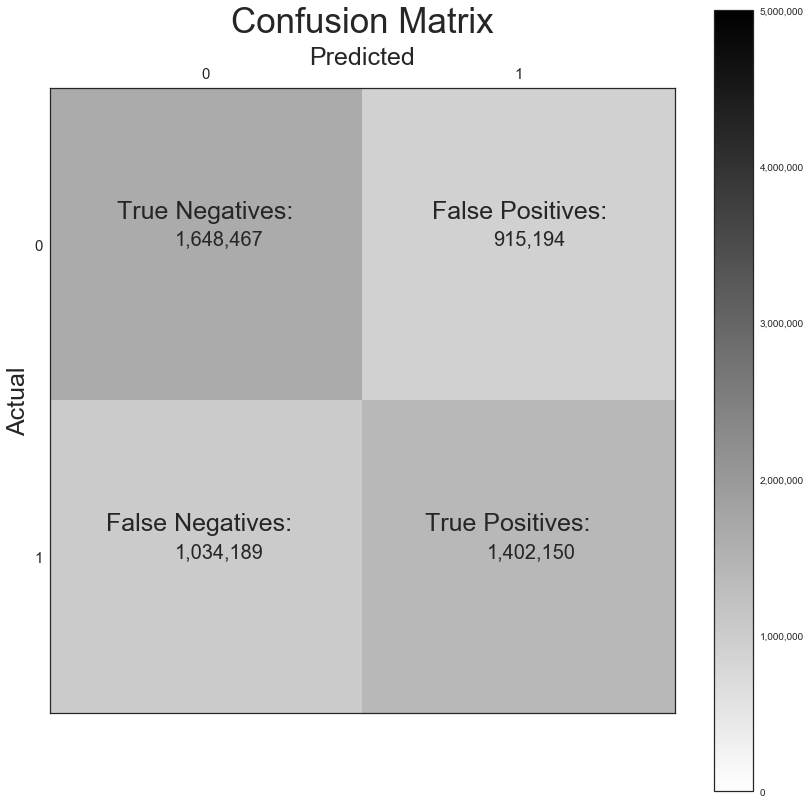

In [29]:
df_confusion = pd.crosstab(logistic_output_df['yBinary'], logistic_output_df['predicted'])

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
plt.matshow(df_confusion, cmap=plt.cm.gray_r)
plt.colorbar(format=comma_fmt)
plt.clim(0,5000000)

tick_marks = np.arange(len(df_confusion.columns))
plt.xticks(tick_marks, df_confusion.columns)
plt.yticks(tick_marks, df_confusion.index)
plt.tick_params(labelsize=15)

plt.ylabel('Actual',fontsize=25)
plt.xlabel('Predicted',fontsize=25,labelpad=-667)
plt.text(-0.32,1,'False Negatives: \n',fontsize=25)

plt.text(-0.1,1,format(round(df_confusion[0][1],2), ",d"),fontsize=20)
plt.text(-0.285,0,'True Negatives: \n',fontsize=25)

plt.text(-0.1,0,format(round(df_confusion[0][0],2),",d"),fontsize=20)
plt.text(.7,1,'True Positives: \n',fontsize=25)

plt.text(.9,1,format(round(df_confusion[1][1],2),",d"),fontsize=20)
plt.title('Confusion Matrix',fontsize=35,y=1.08)

plt.text(0.725,0,'False Positives: \n',fontsize=25)
plt.text(.92,0,format(round(df_confusion[1][0],2),",d"),fontsize=20);

## Close the to connection to SAS

In [26]:
sas._endsas()

SAS Connection terminated. Subprocess id was 24180
